In [ ]:
from MES_LSTM.model import *
from utils.metrics import *

import warnings
warnings.simplefilter('ignore')

# check version
print(tf.keras.__version__)
print(tf.__version__)
print(tfp.__version__)
print(tf.config.list_physical_devices('GPU'))



2.4.0
2.4.1
0.12.2
[]


2021-09-15 15:18:06.088680: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [ ]:
pre_layer = preprocess(first_time = 0, loc = 'Seychelles', thresh = 0.45) # change first time to 1 if first time running to download data
df = pre_layer.load_data()
df = pre_layer.clean_data(df)
df = pre_layer.fill_missing(df)
scaled_df, df_scaler = pre_layer.scale(df)
scaled_df

[INFO] data cleaned
[INFO] the dataframe has 28 columns in total and 15 columns that have missing values.
                         Missing Values  % of Total Values
icu_patients                        549              100.0
hosp_patients                       549              100.0
weekly_icu_admissions               549              100.0
weekly_hosp_admissions              549              100.0
total_tests                         549              100.0
positive_rate                       549              100.0
total_boosters                      549              100.0
handwashing_facilities              549              100.0
excess_mortality                    533               97.1
people_fully_vaccinated             498               90.7
total_vaccinations                  483               88.0
people_vaccinated                   483               88.0
total_deaths                        296               53.9
reproduction_rate                   120               21.9
stringenc

,total_cases,total_deaths,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-03-15,1.000000,1.000000,1.119321,1.026290,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-16,1.000097,1.000171,1.177291,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-17,1.000097,1.000171,1.177291,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-18,1.000194,1.000256,1.177361,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-19,1.000194,1.000256,1.177361,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,2.000000,2.000000,1.812030,1.938529,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-11,2.000000,2.000000,1.804511,1.933853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-12,2.000000,2.000000,1.804511,1.933853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-13,2.000000,2.000000,1.502078,1.742932,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
mes_layer = ES(loc = 'Seychelles')
params, internals = mes_layer.es(scaled_df)
es_scaled, df_trend, df_seas = mes_layer.deTS(scaled_df, internals)

es_scaled

[INFO] internals executed


,total_cases,total_deaths,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-03-15,4.328655e-07,2.926326e-12,-8.687495e-14,-3.536615e-13,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10
2020-03-16,2.169663e-06,1.510816e-11,1.804257e-11,5.390596e-10,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09
2020-03-17,-2.000152e-06,-6.381562e-12,-5.931700e-12,-1.396278e-11,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09
2020-03-18,-2.340678e-06,1.148376e-11,-6.316392e-12,-3.595435e-11,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09
2020-03-19,-1.159285e-06,-3.043668e-11,-5.075884e-12,-9.433010e-13,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,-3.503966e-05,-5.657133e-11,-5.011491e-12,-1.803435e-11,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07
2021-09-11,-2.607965e-05,-5.964695e-11,-4.586387e-12,-2.898742e-11,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07
2021-09-12,-1.959639e-05,-7.855783e-11,-1.770251e-12,-5.959566e-12,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07
2021-09-13,-1.229395e-05,-5.248482e-11,-1.011484e-10,-7.030372e-10,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07


[INFO] data shape: train = (495, 16), valid = (13, 16), test = (41, 16), x_train = (495, 14), y_train = (495, 2), x_valid = (13, 14), y_valid = (13, 2), x_test = (41, 14)


2021-09-15 15:18:30.383619: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-15 15:18:30.430606: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               99000     
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 99,302
Trainable params: 99,302
Non-trainable params: 0
_________________________________________________________________
None


2021-09-15 15:18:31.831157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-15 15:18:31.831842: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3291985000 Hz


Epoch 1/15
16/16 [==============================] - 6s 200ms/step - loss: 3.7018e-07 - val_loss: 9.9186e-08
Epoch 2/15
16/16 [==============================] - 0s 22ms/step - loss: 5.5746e-08 - val_loss: 1.3814e-08
Epoch 3/15
16/16 [==============================] - 0s 22ms/step - loss: 8.9955e-09 - val_loss: 1.4523e-09
Epoch 4/15
16/16 [==============================] - 0s 20ms/step - loss: 2.3589e-09 - val_loss: 4.3942e-10
Epoch 5/15
16/16 [==============================] - 0s 21ms/step - loss: 8.5279e-10 - val_loss: 3.6139e-10
Epoch 6/15
16/16 [==============================] - 0s 20ms/step - loss: 2.8158e-10 - val_loss: 6.9199e-11
Epoch 7/15
16/16 [==============================] - 0s 21ms/step - loss: 1.3436e-10 - val_loss: 1.1634e-10
Epoch 8/15
16/16 [==============================] - 0s 20ms/step - loss: 1.7680e-10 - val_loss: 9.5017e-11
Epoch 9/15
16/16 [==============================] - 0s 20ms/step - loss: 2.6899e-10 - val_loss: 1.3719e-11
Epoch 10/15
16/16 [=================

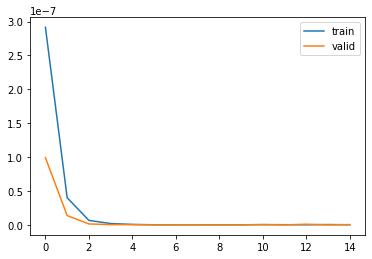

In [ ]:
dl_layer = lstm(loc = 'Seychelles')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(es_scaled)
y_pred_es_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] forecasts saved in results folder


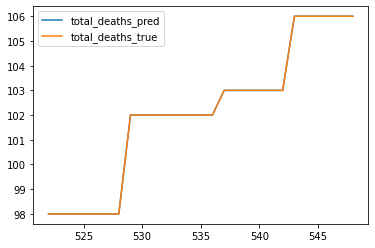

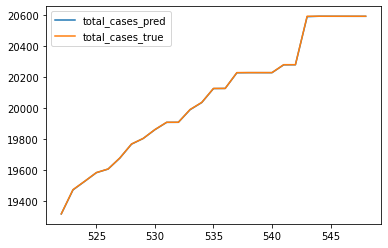

In [ ]:
forecasts = dl_layer.reTS(y_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

### prediction intervals

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 2)                 602       
Total params: 99,602
Trainable params: 99,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 3s 52ms/step - loss: 761.9144 - val_loss: 758.1354
Epoch 2/15
16/16 [==============================] - 0s 24ms/step - loss: 756.9312 - val_loss: 753.2230
Epoch 3/15
16/16 [==============================] - 0s 23ms/step - loss: 752.0246 - val_loss: 748.3738
Epoch 4/15
16/16 [==============================] - 0s 24ms/step - loss: 747.1330 - val_loss: 743.5735
Epoch 5/15
16/16 [==============================] - 0s 24ms/step - loss: 742.4243 - val_loss: 7

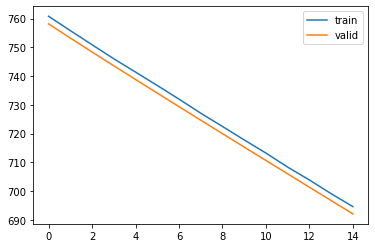

[INFO] prediction intervals computed


In [ ]:
pi_pred_es_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] prediction intervals saved in results folder


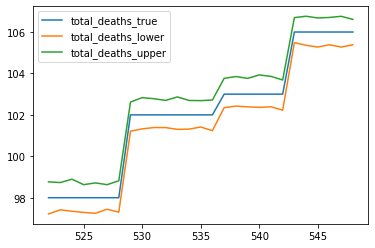

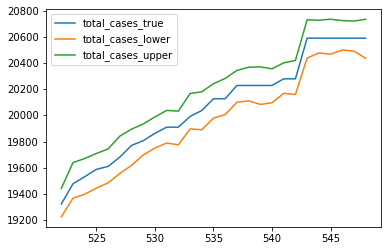

In [ ]:
pi = dl_layer.reTS_pi(pi_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

1.407087009340208
261.51482915768685


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

100.0
100.0


In [ ]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.00012276378322168287
0.0036782544148705183


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

15.777703421507006
92938.14451011551


# RNN

[INFO] data shape: train = (495, 16), valid = (13, 16), test = (41, 16), x_train = (495, 14), y_train = (495, 2), x_valid = (13, 14), y_valid = (13, 2), x_test = (41, 14)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 99,302
Trainable params: 99,302
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 2s 43ms/step - loss: 0.4447 - val_loss: 1.0541
Epoch 2/15
16/16 [==============================] - 0s 21ms/step - loss: 0.0877 - val_loss: 0.8158
Epoch 3/15
16/16 [==============================] - 0s 21ms/step - loss: 0.0290 - val_loss: 0.7834
Epoch 4/15
16/16 [=====================

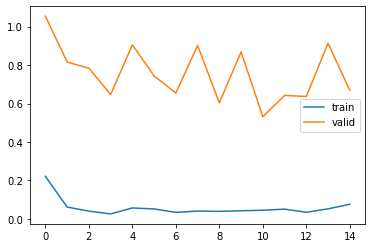

[INFO] forecasts saved in results folder


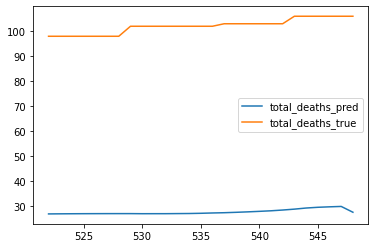

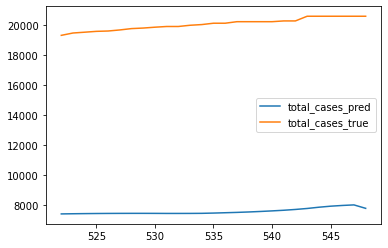

In [ ]:
dl_layer = lstm(results_path = 'results/pure_lstm/', loc = 'Seychelles')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(scaled_df)
y_pred_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

forecasts = dl_layer.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)

### prediction intervals

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 2)                 602       
Total params: 99,602
Trainable params: 99,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 2s 51ms/step - loss: 760.0275 - val_loss: 757.1511
Epoch 2/15
16/16 [==============================] - 0s 20ms/step - loss: 754.6855 - val_loss: 751.9216
Epoch 3/15
16/16 [==============================] - 0s 22ms/step - loss: 749.6763 - val_loss: 746.6483
Epoch 4/15
16/16 [==============================] - 0s 20ms/step - loss: 744.8471 - val_loss: 742.0525
Epoch 5/15
16/16 [==============================] - 0s 20ms/step - loss: 739.9787 - val_loss: 7

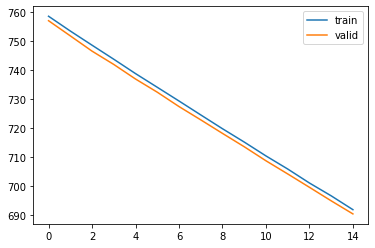

[INFO] prediction intervals computed
[INFO] prediction intervals saved in results folder


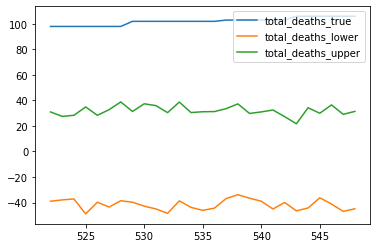

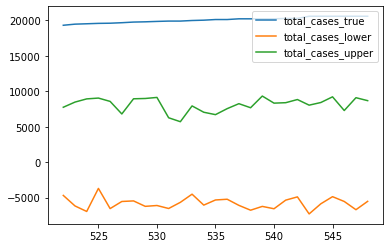

In [ ]:
pi_pred_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

pi = dl_layer.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [ ]:
pi.head()

,total_deaths_true,total_deaths_lower,total_cases_lower,total_cases_true,total_deaths_upper,total_cases_upper
522,98.0,-38.983579,-4704.545714,19320.0,30.987150,7743.124119
523,98.0,-37.950588,-6190.818769,19476.0,27.484254,8473.859829
524,98.0,-37.202509,-6970.345544,19530.0,28.370721,8923.880799
525,98.0,-48.941766,-3713.752802,19586.0,34.901449,9039.729009
526,98.0,-39.762417,-6564.991174,19609.0,28.350945,8569.412612


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

1475.9280686453033
252825.7312745175


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [ ]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

114.35658686505847
90.25612891365898


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

84.38137441026733
14178.806005820968


# VARMAX

[INFO] data shape: train = (495, 16), test = (54, 16), x_train = (495, 14), y_train = (495, 2), x_test = (54, 14)
[INFO] VARMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


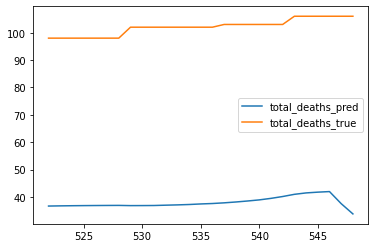

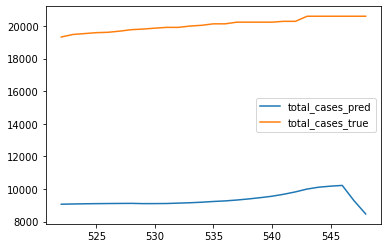

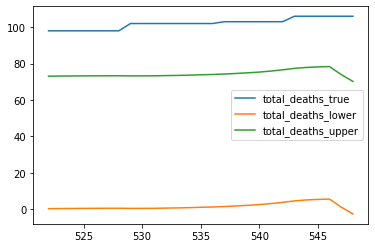

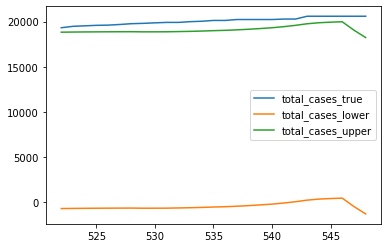

In [ ]:
bench = stats(loc = 'Seychelles')
train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_varmax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

626.78705192018
38596.5133279544


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [ ]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

91.55842212417821
72.94026324723987


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

72.82585776856153
12180.742993971566


# SARIMAX

[INFO] SARIMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


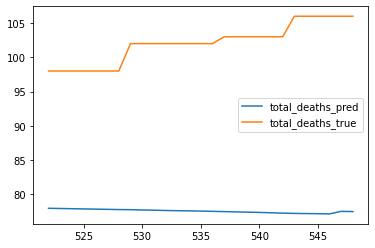

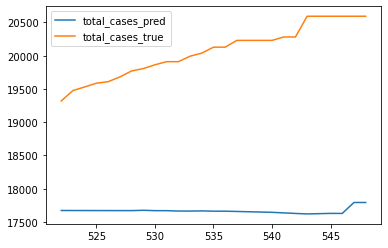

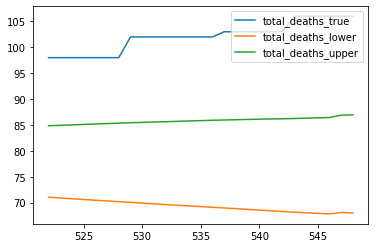

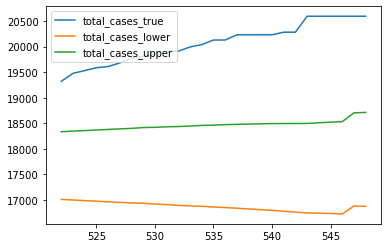

In [ ]:
bench = stats(results_path = 'results/sarimax/', loc = 'Seychelles')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_sarimax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

341.92045429979333
33648.53787269127


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [ ]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

27.27346113367887
12.70250695806928


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

27.87477016026167
2727.0053176627584


# MLR

[INFO] MLR fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


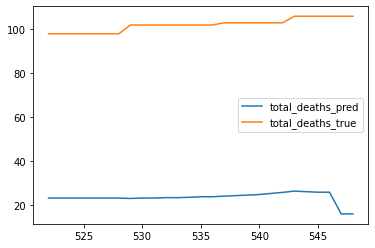

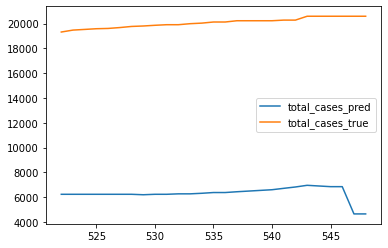

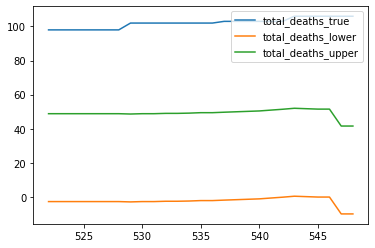

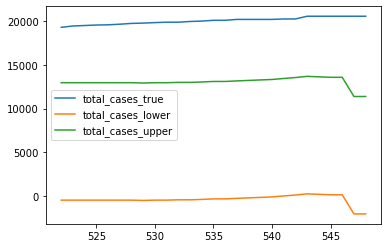

In [ ]:
bench = stats(results_path = 'results/mlr/', loc = 'Seychelles')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_mlr(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

1110.1805983017086
153912.22334086994


In [ ]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [ ]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

125.58155871110364
104.46359849084591


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

89.43715526963973
15635.271085526256
